In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wt_fn = "iSO595v6/WT/results_table.csv"
gnd_fn = "iSO595v6/gnd/results_table.csv"
glgC_fn = "iSO595v6/glgC/results_table.csv"

df_wt = pd.read_csv(wt_fn)
df_gnd = pd.read_csv(gnd_fn)
df_glgC = pd.read_csv(glgC_fn)



In [4]:
df = df_wt.drop(columns = ["Glycogen", "Photon", "Time"])
df.columns = ["WT"]
df["$\Delta glgC$"] = df_glgC["Biomass"]
df["$\Delta gnd$"] = df_gnd["Biomass"]
df["Days"] = df_wt["Time"]/24
df = df.melt(id_vars = ["Days"], var_name = "Strain", value_name  = "Biomass")

In [5]:
df_wt


,Time,Biomass,Glycogen,Photon
0,0.0,8.580000e-08,0.000000e+00,0.000000
1,0.1,8.576425e-08,0.000000e+00,0.000000
2,0.2,8.572851e-08,0.000000e+00,0.001047
3,0.3,8.569279e-08,0.000000e+00,0.002093
4,0.4,8.565709e-08,0.000000e+00,0.003138
...,...,...,...,...
2396,239.6,3.568205e-07,2.030954e-14,0.000000
2397,239.7,3.566718e-07,1.668611e-14,0.000000
2398,239.8,3.565232e-07,1.371038e-14,0.000000
2399,239.9,3.563747e-07,1.126634e-14,0.000000


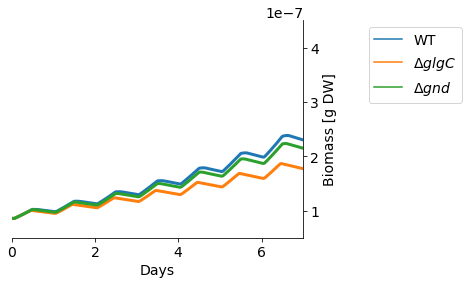

In [6]:
#fig, ax = plt.subplots
matplotlib.rcParams['axes.formatter.limits'] = (-5, 7)
matplotlib.rcParams['font.size'] = 14
fig, ax = plt.subplots(1)
sns.lineplot(x ="Days", y = "Biomass", hue = "Strain", data = df, ax = ax, lw = 3)
ax.set_xlim(0, 7)
ax.set_ylim(0.05*1e-6,0.45*1e-6)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.tick_right()
#ax2.set_ylim(0, 0.03)
ax.yaxis.set_label_position("right")
ax.set_ylabel("Biomass [g DW]")
ax.legend(loc = "upper left", bbox_to_anchor = [1.2, 1])
plt.subplots_adjust(right = 0.8)
plt.savefig('Biomass.png')
plt.savefig('Biomass.svg')

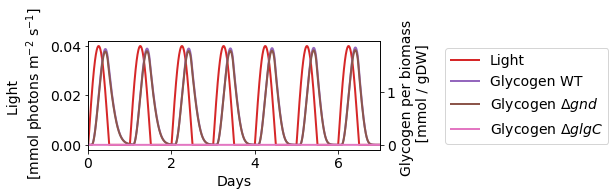

In [7]:
fig, ax = plt.subplots(1, figsize = (6, 2))
ln1 = ax.plot(df_wt["Time"]/24, df_wt["Photon"], label = "Light", c = "C3", lw = 2)
ax2 = ax.twinx()
ln2 = ax2.plot(df_wt["Time"]/24, df_wt["Glycogen"]/df_wt["Biomass"], c = "C4",label = "Glycogen WT", lw = 2)
ln3 = ax2.plot(df_gnd["Time"]/24, df_gnd["Glycogen"]/df_gnd["Biomass"], c = "C5",label = "Glycogen $\Delta gnd$", lw = 2)
ln4 = ax2.plot(df_glgC["Time"]/24, df_glgC["Glycogen"]/df_glgC["Biomass"], c = "C6",label = "Glycogen $\Delta glgC$", lw = 2)

# added these three lines
lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = "upper left", bbox_to_anchor = [1.2, 1])
ax.set_xlim(0, 7)
ax.set_xlabel("Days")
ax.set_ylabel("Light \n [mmol photons $\mathrm{m}^{-2}$ $\mathrm{s}^{-1}$]")
ax2.set_ylabel("Glycogen per biomass \n [mmol / gDW]")
plt.subplots_adjust(right = 0.8)
plt.savefig('glycogen_light.svg')

In [10]:
# Load experimental data
df_exp = pd.read_excel('7942 LD growth.xlsx', sheets = "12-12")
stubnames = list(set([x.split("-")[0] for x in df_exp.columns]))[:-1]
columns = [x for x in df_exp.columns if x!="time(d)"]

In [11]:
df_exp


,time(d),WT-1,WT-2,WT-3,WT-4,ΔglgC-1,ΔglgC-2,ΔglgC-3,ΔglgC-4,Δgnd-1,Δgnd-2,Δgnd-3,Δgnd-4
0,0.000000,0.052,0.062,0.099,0.099,0.064,0.087,0.081,0.082,0.107,NaN,0.083,0.093
1,0.006944,0.060,0.057,0.078,0.080,0.059,0.063,0.080,0.084,0.087,NaN,0.094,0.090
2,0.013889,0.057,0.059,0.081,0.087,0.059,0.086,0.091,0.078,0.107,0.083,0.088,0.098
3,0.020833,0.056,0.063,0.077,0.084,0.072,0.080,0.083,0.083,0.097,0.082,0.076,0.085
4,0.027778,0.049,0.060,0.073,0.096,0.074,0.065,0.092,0.081,0.097,0.090,0.077,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,6.972222,0.452,0.493,0.489,0.469,0.353,0.363,0.408,0.393,0.105,0.125,NaN,0.203
1005,6.979167,0.459,0.486,NaN,0.474,0.383,0.345,0.411,0.406,0.129,0.113,0.118,0.201
1006,6.986111,0.451,0.488,0.495,0.470,0.357,0.347,0.406,0.395,0.128,0.115,0.105,0.196
1007,6.993056,0.456,0.483,0.486,0.455,0.346,0.371,0.381,0.387,0.114,0.136,0.095,0.197


In [12]:
df

,Days,Strain,Biomass
0,0.000000,WT,8.580000e-08
1,0.004167,WT,8.576425e-08
2,0.008333,WT,8.572851e-08
3,0.012500,WT,8.569279e-08
4,0.016667,WT,8.565709e-08
...,...,...,...
7198,9.983333,$\Delta gnd$,3.254487e-07
7199,9.987500,$\Delta gnd$,3.253131e-07
7200,9.991667,$\Delta gnd$,3.251775e-07
7201,9.995833,$\Delta gnd$,3.250420e-07


In [13]:
df_exp_l  = pd.melt(df_exp, id_vars = "time(d)", value_vars=columns, value_name = "Biomass", var_name = "Strain")


In [14]:
df_exp_l["Strain"] = df_exp_l["Strain"].map(lambda x: x.split("-")[0])

In [15]:
df_exp_l

,time(d),Strain,Biomass
0,0.000000,WT,0.052
1,0.006944,WT,0.060
2,0.013889,WT,0.057
3,0.020833,WT,0.056
4,0.027778,WT,0.049
...,...,...,...
12103,6.972222,Δgnd,0.203
12104,6.979167,Δgnd,0.201
12105,6.986111,Δgnd,0.196
12106,6.993056,Δgnd,0.197


In [16]:
df

,Days,Strain,Biomass
0,0.000000,WT,8.580000e-08
1,0.004167,WT,8.576425e-08
2,0.008333,WT,8.572851e-08
3,0.012500,WT,8.569279e-08
4,0.016667,WT,8.565709e-08
...,...,...,...
7198,9.983333,$\Delta gnd$,3.254487e-07
7199,9.987500,$\Delta gnd$,3.253131e-07
7200,9.991667,$\Delta gnd$,3.251775e-07
7201,9.995833,$\Delta gnd$,3.250420e-07


C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


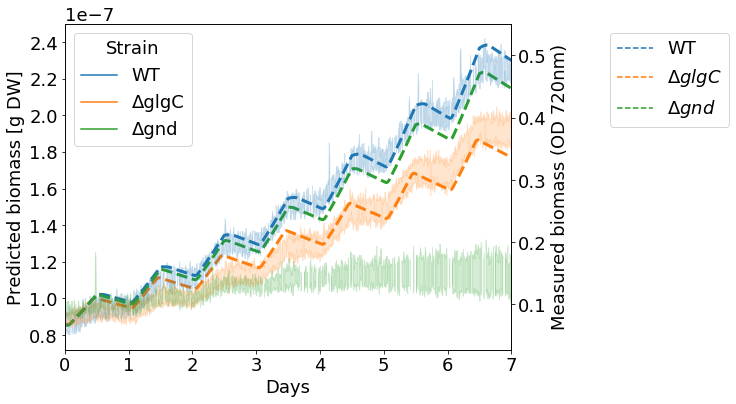

In [25]:
from matplotlib import rc

matplotlib.rcParams['axes.formatter.limits'] = (-5, 7)
matplotlib.rcParams['font.size'] = 18
fig, ax = plt.subplots(1, figsize = (8,6))
df["kind"] = "in silico"
sns.lineplot(x ="Days", y = "Biomass", hue = "Strain", data = df, ax = ax, lw = 3, linestyle = "--")
ax.set_xlim(0, 7)
#ax.set_ylim(0.06*1e-6,0.25*1e-6)
ax.set_ylim(0.072*1e-6,0.25*1e-6)
for l in ax.lines:
    l.set_linestyle("--")
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.yaxis.tick_right()
#ax2.set_ylim(0, 0.03)
#ax.yaxis.set_label_position("right")
ax.set_ylabel("Predicted biomass [g DW]")
ax.legend(loc = "upper left", bbox_to_anchor = [1.2, 1])
ax2 = ax.twinx()
sns.lineplot(data = df_exp_l, x = "time(d)", y = "Biomass", hue = "Strain", alpha = 0.5, ax = ax2, lw = 0)
ax2.set_ylabel("Measured biomass (OD 720nm)")
plt.subplots_adjust(right = 0.9)
plt.savefig("knockout_growth.svg")

In [15]:
df

,Days,Strain,Biomass,kind
0,0.000000,WT,8.580000e-08,in silico
1,0.004167,WT,8.580000e-08,in silico
2,0.008333,WT,8.580000e-08,in silico
3,0.012500,WT,8.580000e-08,in silico
4,0.016667,WT,8.580000e-08,in silico
...,...,...,...,...
7198,9.983333,$\Delta gnd$,5.114454e-07,in silico
7199,9.987500,$\Delta gnd$,5.114454e-07,in silico
7200,9.991667,$\Delta gnd$,5.114454e-07,in silico
7201,9.995833,$\Delta gnd$,5.114454e-07,in silico
